In [7]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as 

In [2]:

"""
1. I predict that being incumbent (being president at the time of the election) would have a correlation with an increase of electoral votes earned
2. Having a higher percentage in the popular vote probably means a higher percentage in the electoral vote.
3. Being from one of the major parties (democrat, republican, or whatever was the dominant party at the time) probably means more votes.
4. If this is not the canadites first time running, they will get more votes.
5. Canadites from certain states will receive more votes than those from other states. 
6. Canadites from certain parties were likely to receive less votes. 
7. The year of the election affects the number of votes in the popular vote. 
8. The most common name for winning presidents was John.
9. The percentage of electoral votes goes up when the number of electoral votes is higher.
10. The abbreviation of the canadite's party depends on the party that they are in.
(As you can tell, I ran out of ideas)
"""

"\n1. I predict that being incumbent (being president at the time of the election) would have a correlation with an increase of electoral votes earned\n2. Having a higher percentage in the popular vote probably means a higher percentage in the electoral vote.\n3. Being from one of the major parties (democrat, republican, or whatever was the dominant party at the time) probably means more votes.\n4. If this is not the canadites first time running, they will get more votes.\n5. Canadites from certain states will receive more votes than those from other states. \n6. Canadites from certain parties were likely to receive less votes. \n7. The year of the election affects the number of votes in the popular vote. \n8. The most common name for winning presidents was John.\n9. The percentage of electoral votes goes up when the number of electoral votes is higher.\n10. The abbreviation of the canadite's party depends on the party that they are in.\n(As you can tell, I ran out of ideas)\n"

In [3]:
results = pd.read_csv("../analysis/election_results.csv")

def process_percent_string(string):
    string = string.replace("%", "")
    num = float(string)
    return num

results["PopVoteShare"] = results["PopVoteShare"].apply(process_percent_string)
results["ElecVoteShare"] = results["ElecVoteShare"].apply(process_percent_string)

results.head(10)

,ElectionYear,CandidateName,HomeState,Incumbent?,CandParty,CandPartyAbbrev,PopularVote,PopVoteShare,ElectoralVotes,ElecVoteShare
0,1788,George Washington,Virginia,N,Independent,I,"39,624",100.0,69,100.00
1,1788,John Adams,Massachusetts,N,Federalist,F,0,0.0,34,49.28
2,1788,John Jay,New York,N,Federalist,F,0,0.0,9,13.04
3,1788,Robert H. Harrison,Maryland,N,Federalist,F,0,0.0,6,8.70
4,1788,John Rutledge,South Carolina,N,Federalist,F,0,0.0,6,8.70
5,1788,John Hancock,Massachusetts,N,Federalist,F,0,0.0,4,5.80
6,1788,George Clinton,New York,N,Anti-Federalist,AF,0,0.0,3,4.35
7,1788,Samuel Huntington,Connecticut,N,Federalist,F,0,0.0,2,2.90
8,1788,John Milton,Georgia,N,Federalist,F,0,0.0,2,2.90
9,1788,James Armstrong,Georgia,N,Federalist,F,0,0.0,1,1.45


In [4]:
incumbent = results[results["Incumbent?"] == "Y"]\
        [results["ElecVoteShare"] > 50]['ElecVoteShare'].count()
nonincumbent = results[results["ElecVoteShare"] > 50]["ElecVoteShare"].count()
incumbent_rate = incumbent/(nonincumbent - incumbent)
print("The percentage of presidents that won the election that were incumbent, including the first time they ran, was", incumbent_rate)

The percentage of presidents that won the election that were incumbent, including the first time they ran, was 0.5789473684210527


/tmp/ipykernel_978/1743483957.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incumbent = results[results["Incumbent?"] == "Y"]\


In [5]:
high_votes = results[results["PopVoteShare"] > 50]\
    [results["ElecVoteShare"] > 50]["ElecVoteShare"].count()
total_high_pop = results[results["PopVoteShare"] > 50]["ElecVoteShare"].count()
percent = high_votes/total_high_pop
print("The percentage of canadites that won the popular vote and the electoral vote compared to those that only won the popular vote was", percent)

The percentage of canadites that won the popular vote and the electoral vote compared to those that only won the popular vote was 0.9523809523809523


/tmp/ipykernel_978/1530240933.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_votes = results[results["PopVoteShare"] > 50]\


<AxesSubplot:ylabel='CandParty'>

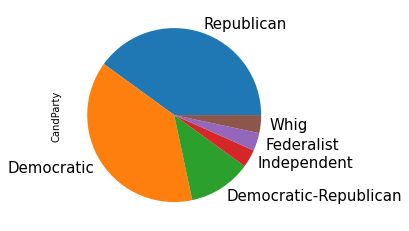

In [27]:
winners = results[results["ElecVoteShare"] > 50]["CandParty"]
winners_count = winners.value_counts()
winners_count.plot(kind='pie', fontsize=15)

<AxesSubplot:ylabel='HomeState'>

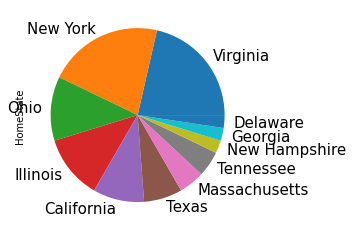

In [28]:
many_votes = results[results["PopVoteShare"] > 50]["HomeState"]
count = many_votes.value_counts()
count.plot(kind='pie', fontsize=15)